In [16]:
!pip install pandas networkx matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [17]:
!pip install pandas networkx

Defaulting to user installation because normal site-packages is not writeable


Nodes values: "conservative," "liberal," and "neutral"

## Data Loading

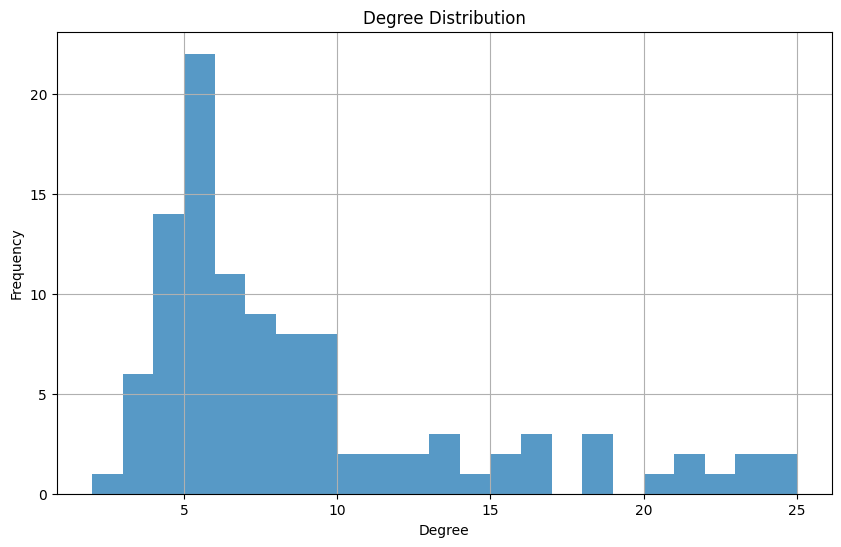

Number of nodes: 105
Number of edges: 441
Average degree: 8.40
Max degree: 25
Min degree: 2


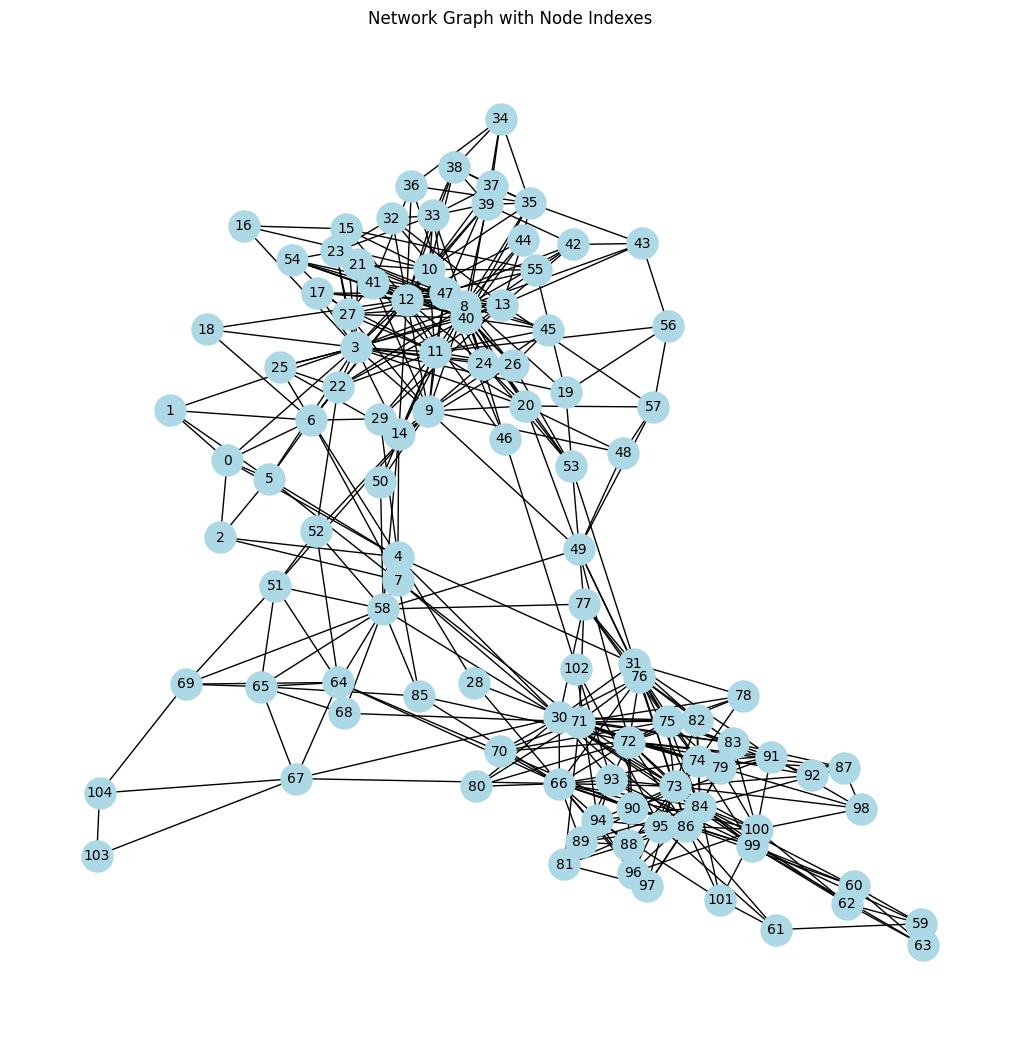

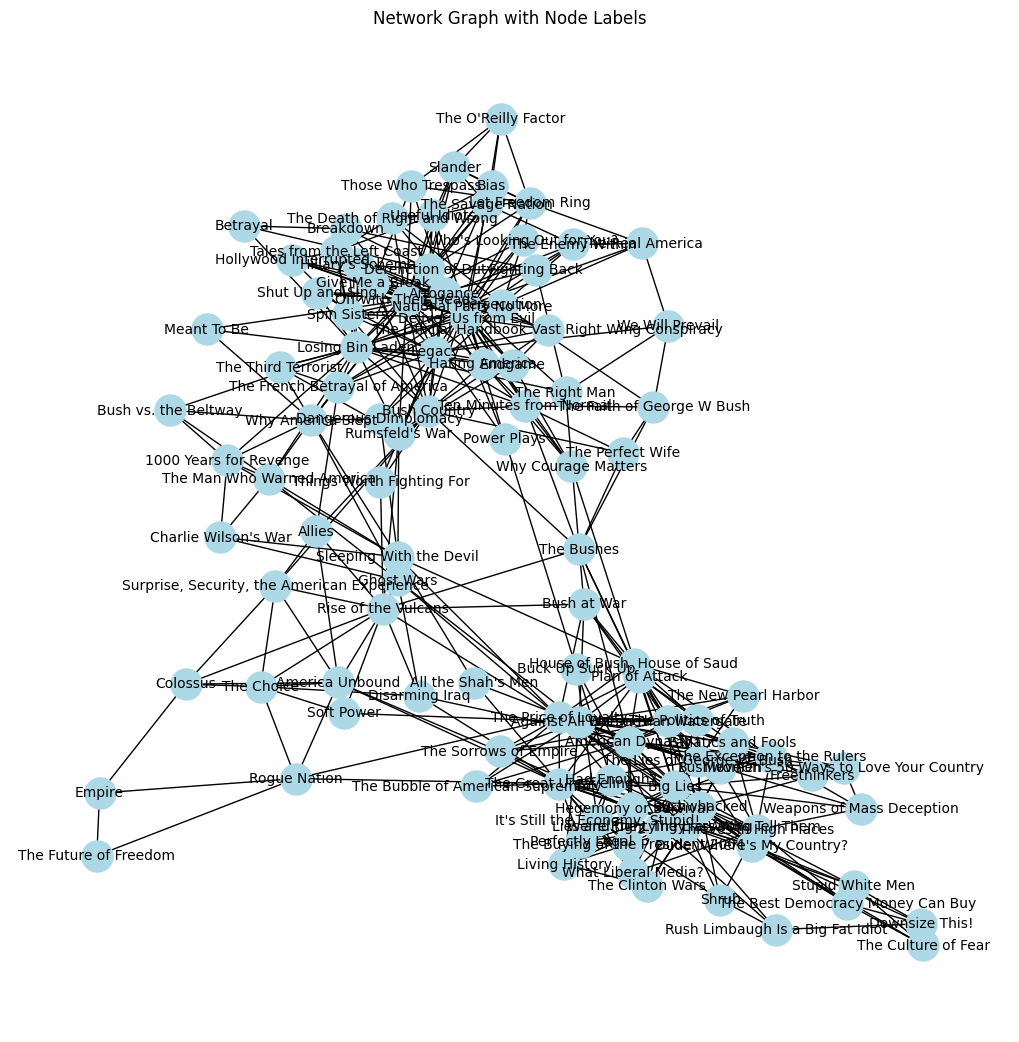

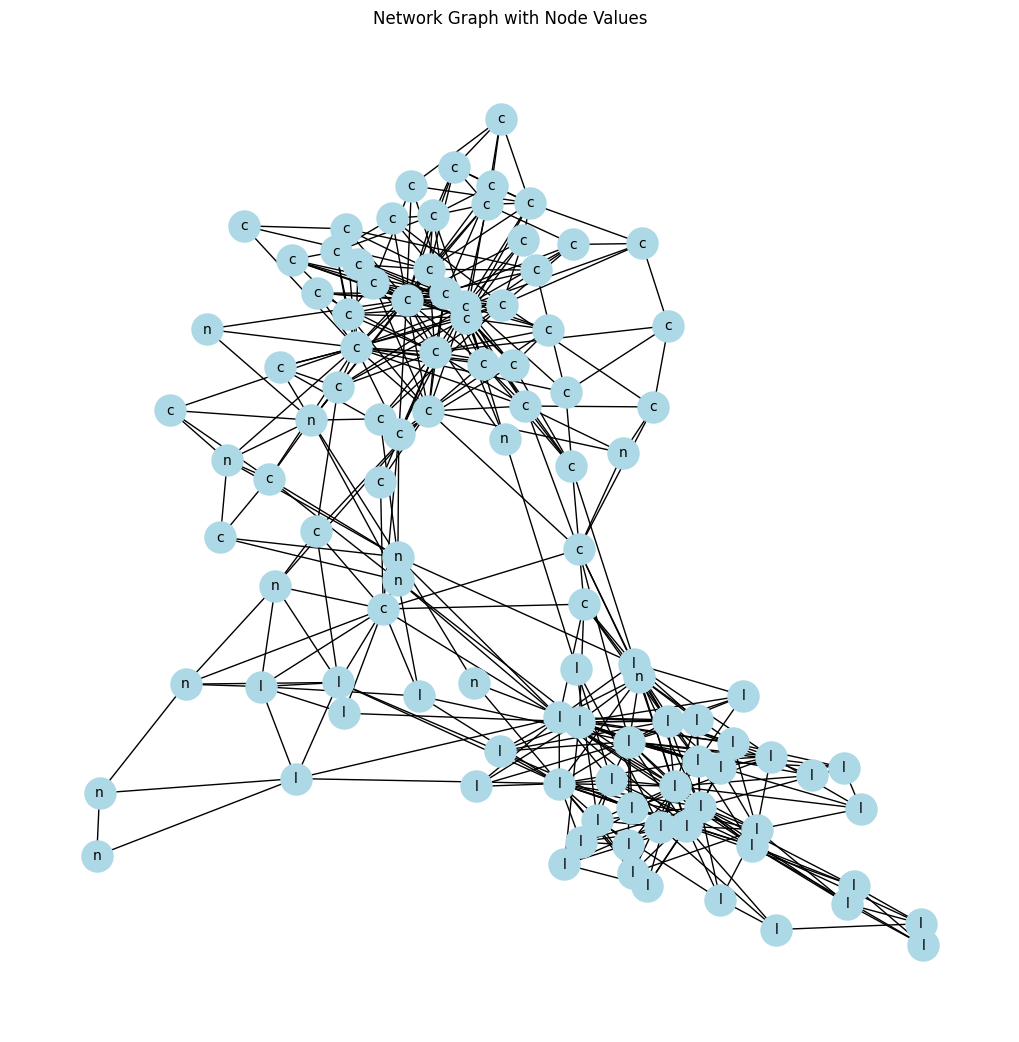

In [63]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the datasets
edges_df = pd.read_csv('./data/edges.csv', header=0, names=['source', 'target'])
nodes_df = pd.read_csv('./data/nodes.csv', header=0, names=['index', 'label', 'value', '_pos'])

# Create a graph using the edges dataframe
G = nx.from_pandas_edgelist(edges_df, 'source', 'target')

# Add node attributes from nodes_df (matching by 'index' column)
for _, row in nodes_df.iterrows():
    if row['index'] in G.nodes:
        G.nodes[row['index']]['label'] = row['label']
        G.nodes[row['index']]['value'] = row['value']

# Metrics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / num_nodes
degree_distribution = [deg for node, deg in G.degree()]

# Plot Degree Distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_distribution, bins=range(min(degree_distribution), max(degree_distribution) + 1), alpha=0.75)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print some network metrics
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {avg_degree:.2f}")
print(f"Max degree: {max(degree_distribution)}")
print(f"Min degree: {min(degree_distribution)}")

# Function to draw the graph with different node attributes
def plot_graph_with_attributes(attribute_name, title, seed=42):
    node_labels = {node: str(node) for node in G.nodes} if attribute_name == 'index' else {node: G.nodes[node].get(attribute_name, '') for node in G.nodes}
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=seed)
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=500, node_color='lightblue', font_size=10)
    plt.title(title)
    plt.show()

# Plot the graph using different node attributes
plot_graph_with_attributes('index', 'Network Graph with Node Indexes')
plot_graph_with_attributes('label', 'Network Graph with Node Labels')
plot_graph_with_attributes('value', 'Network Graph with Node Values')


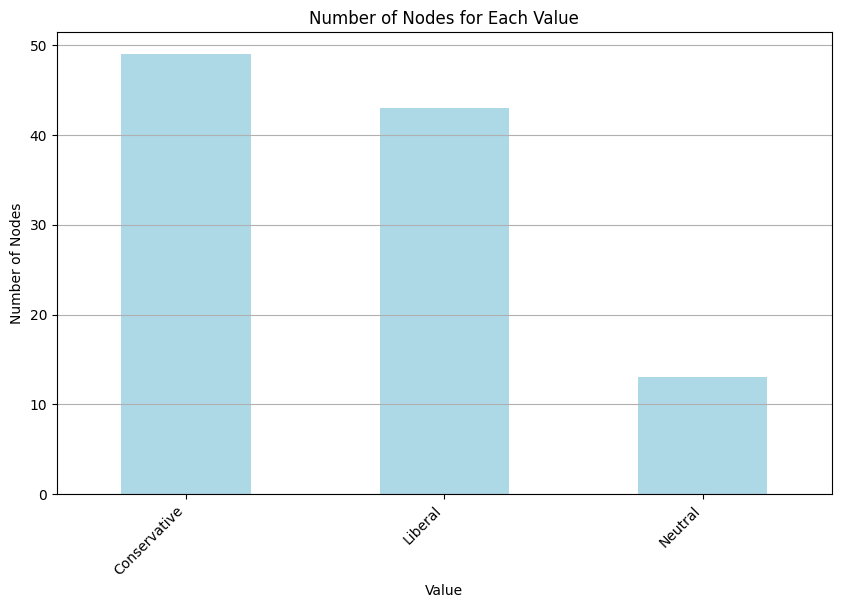

In [64]:
# Map values to more descriptive labels
value_mapping = {'l': 'Liberal', 'n': 'Neutral', 'c': 'Conservative'}

# Get the 'value' attribute for each node and map it to the corresponding label
node_values = [value_mapping.get(G.nodes[node]['value'], G.nodes[node]['value']) for node in G.nodes]

# Count the occurrences of each label
value_counts = pd.Series(node_values).value_counts()

# Plot the value counts as a bar plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='lightblue')
plt.title('Number of Nodes for Each Value')
plt.xlabel('Value')
plt.ylabel('Number of Nodes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


## PageRank

In [54]:
# Compute PageRank
pagerank = nx.pagerank(G)

# Print top 5 books with highest PageRank
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
top_5_books_pagerank = sorted_pagerank[:5]

top_5_books_pagerank


[(12, 0.025586835412470296),
 (8, 0.024989526526750017),
 (3, 0.02423042104025228),
 (84, 0.023179612771419066),
 (72, 0.02239307368693696)]

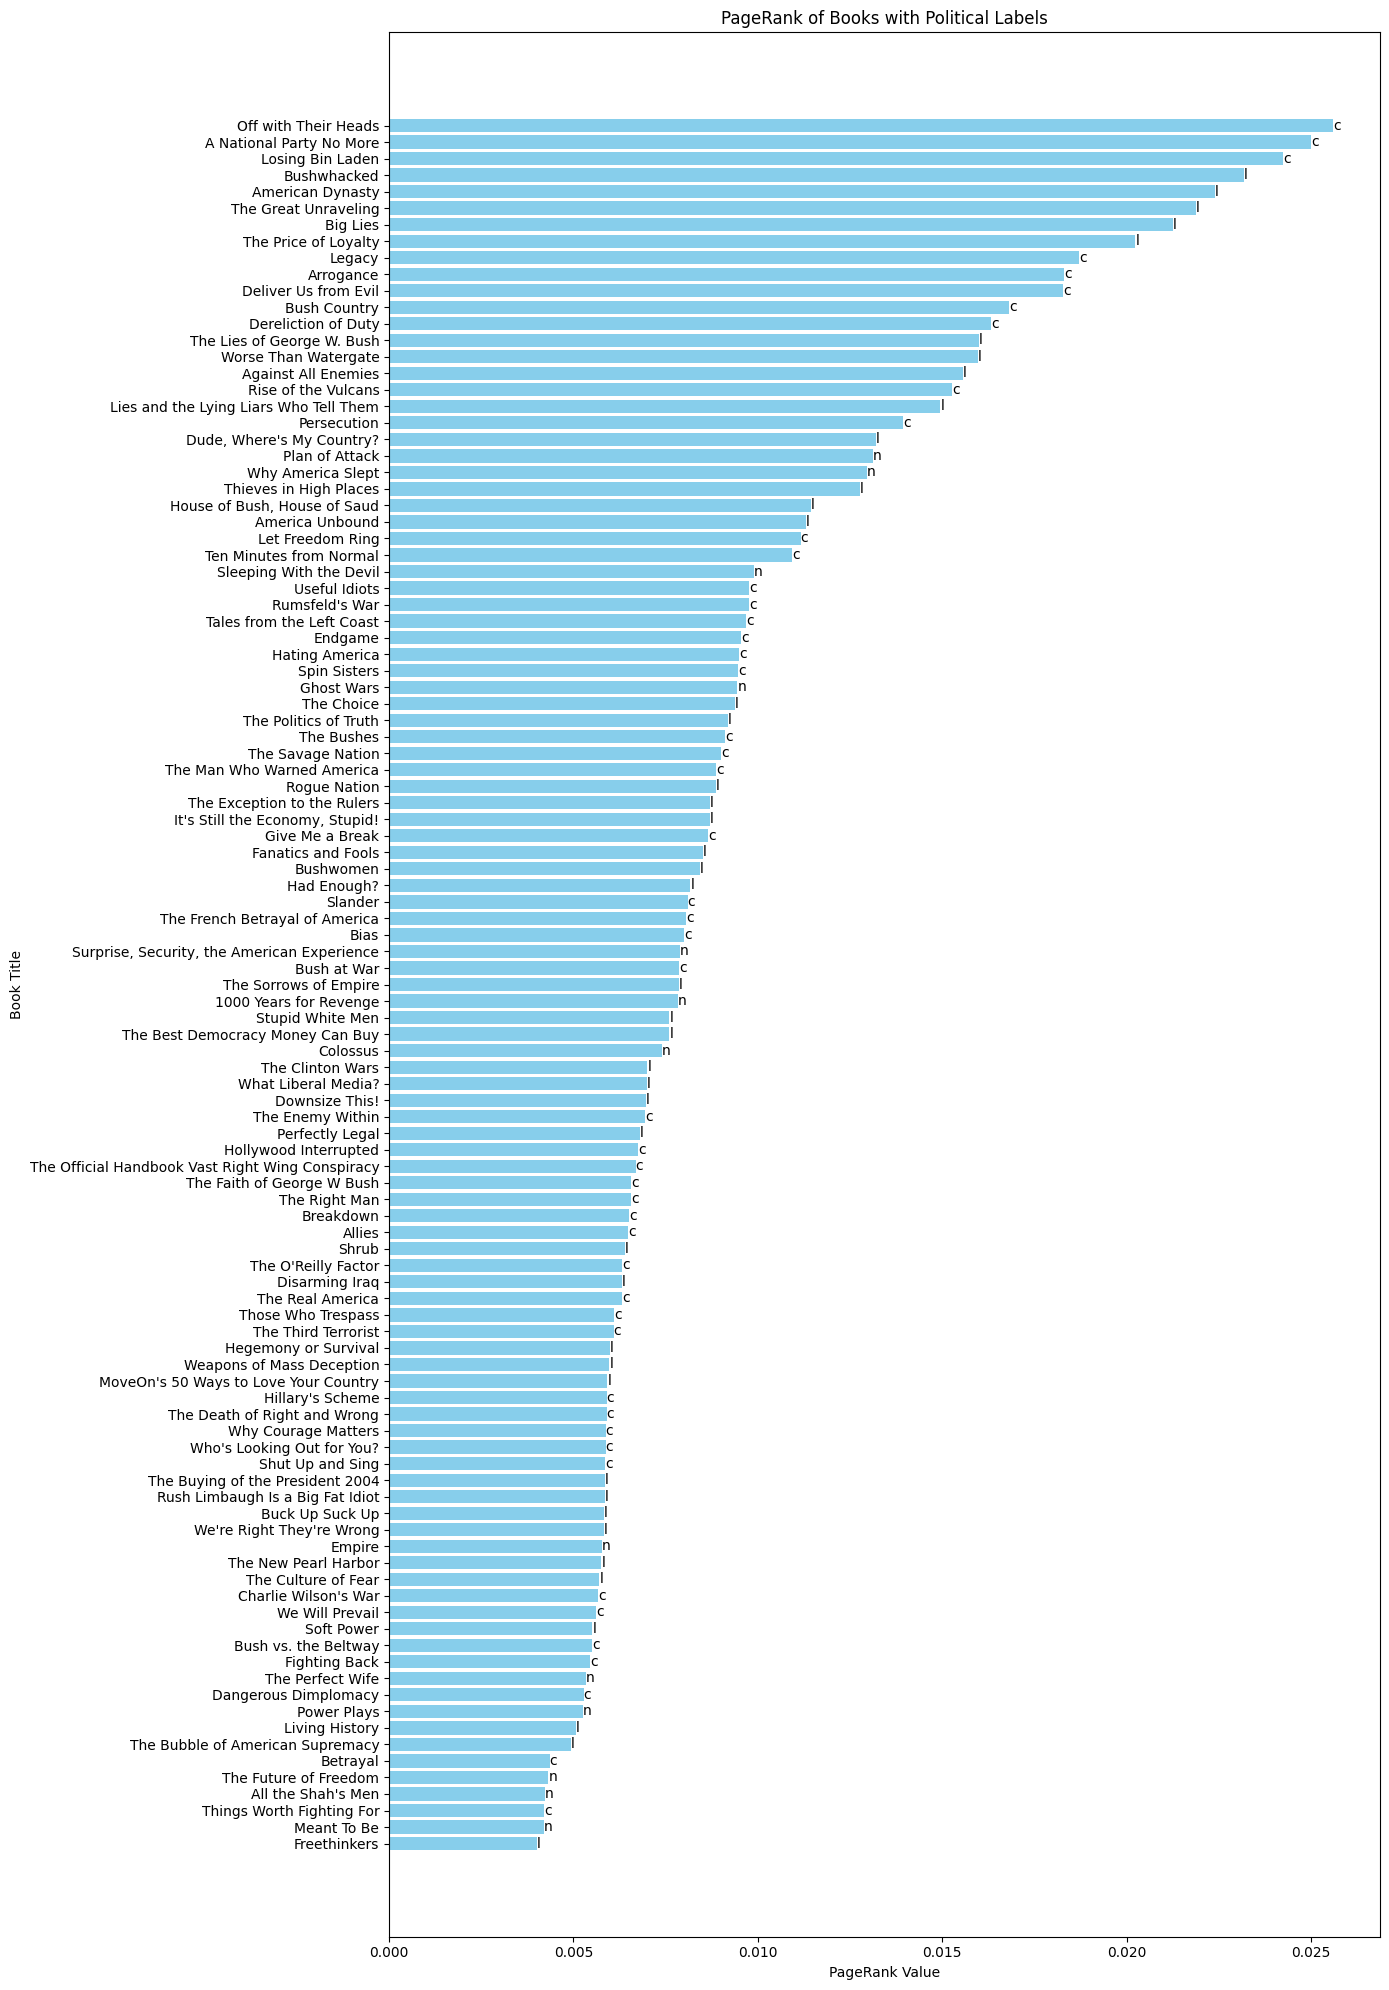

,Book Title,PageRank,Political Label
12,Off with Their Heads,0.025587,c
8,A National Party No More,0.024990,c
3,Losing Bin Laden,0.024230,c
84,Bushwhacked,0.023180,l
72,American Dynasty,0.022393,l
...,...,...,...
103,The Future of Freedom,0.004322,n
28,All the Shah's Men,0.004229,n
50,Things Worth Fighting For,0.004203,c
18,Meant To Be,0.004195,n


In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your graph has 'label' for title and 'value' for political label
pagerank = nx.pagerank(G)

# Extract titles (labels), PageRank values, and political labels (values)
titles = [G.nodes[node].get('label', node) for node in G.nodes]  # Get 'label' attribute or node ID
pagerank_values = [pagerank[node] for node in G.nodes]
political_labels = [G.nodes[node].get('value', '') for node in G.nodes]  # Get 'value' for political label

# Create a DataFrame for easy handling
df_pagerank = pd.DataFrame({
    'Book Title': titles,
    'PageRank': pagerank_values,
    'Political Label': political_labels
})

# Sort the DataFrame by PageRank values (highest to lowest)
df_pagerank_sorted = df_pagerank.sort_values(by='PageRank', ascending=False)

# Plotting the PageRank values with political labels
plt.figure(figsize=(14, 20))  # Increase figure size for more space
bars = plt.barh(df_pagerank_sorted['Book Title'], df_pagerank_sorted['PageRank'], color='skyblue', height=0.8)

# Annotate each bar with the political label
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             df_pagerank_sorted['Political Label'].iloc[i], 
             va='center', ha='left', fontsize=10, color='black')

plt.title('PageRank of Books with Political Labels')
plt.xlabel('PageRank Value')
plt.ylabel('Book Title')
plt.gca().invert_yaxis()  # Invert y-axis to show the top-ranked books at the top
plt.tight_layout()
plt.show()
df_pagerank_sorted

k-Core Decomposition: Identifies the k-core structure of the graph.

In [55]:
# Compute k-Core Decomposition
k_core = nx.core_number(G)

# Get the nodes belonging to the largest k-core (maximum k-value)
max_k = max(k_core.values())
largest_k_core = [node for node, core in k_core.items() if core == max_k]

max_k, largest_k_core


(6,
 [3,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  20,
  23,
  24,
  26,
  27,
  30,
  31,
  33,
  35,
  37,
  38,
  39,
  40,
  41,
  45,
  47,
  54,
  66,
  71,
  72,
  73,
  74,
  75,
  76,
  79,
  82,
  83,
  84,
  86,
  91,
  99,
  100])

Triad Census: Counts the number of triads (three-node subgraphs) in the network and classifies them.

In [56]:
# Convert the graph to a directed graph
G_directed = G.to_directed()

# Compute Triad Census for the directed graph
triads = nx.triadic_census(G_directed)

# Display the triads and their counts
triads


{'003': 146299,
 '012': 0,
 '102': 37459,
 '021D': 0,
 '021U': 0,
 '021C': 0,
 '111D': 0,
 '111U': 0,
 '030T': 0,
 '030C': 0,
 '201': 3142,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 560}

In [57]:
G.nodes(data=True)

NodeDataView({1: {'label': 'Bush vs. the Beltway', 'value': 'c'}, 0: {'label': '1000 Years for Revenge', 'value': 'n'}, 2: {'label': "Charlie Wilson's War", 'value': 'c'}, 3: {'label': 'Losing Bin Laden', 'value': 'c'}, 4: {'label': 'Sleeping With the Devil', 'value': 'n'}, 5: {'label': 'The Man Who Warned America', 'value': 'c'}, 6: {'label': 'Why America Slept', 'value': 'n'}, 7: {'label': 'Ghost Wars', 'value': 'n'}, 8: {'label': 'A National Party No More', 'value': 'c'}, 9: {'label': 'Bush Country', 'value': 'c'}, 10: {'label': 'Dereliction of Duty', 'value': 'c'}, 11: {'label': 'Legacy', 'value': 'c'}, 12: {'label': 'Off with Their Heads', 'value': 'c'}, 13: {'label': 'Persecution', 'value': 'c'}, 14: {'label': "Rumsfeld's War", 'value': 'c'}, 15: {'label': 'Breakdown', 'value': 'c'}, 16: {'label': 'Betrayal', 'value': 'c'}, 17: {'label': 'Shut Up and Sing', 'value': 'c'}, 18: {'label': 'Meant To Be', 'value': 'n'}, 19: {'label': 'The Right Man', 'value': 'c'}, 20: {'label': 'Ten 

In [59]:
import networkx as nx
import pandas as pd
from collections import Counter
import numpy as np

# Assuming you have loaded your graph (G) correctly from the CSV files
# and node attributes are properly set as per the earlier example.

def compute_homophily(G):
    node_labels = {node: data['value'] for node, data in G.nodes(data=True)}  # Use .get() to avoid KeyError
    same_label_edges = 0
    total_edges = 0
    
    for u, v in G.edges():
        total_edges += 1
        if node_labels[u] == node_labels[v]:
            same_label_edges += 1
            
    homophily_ratio = same_label_edges / total_edges if total_edges > 0 else 0
    return homophily_ratio

# Modularity
def compute_modularity(G):
    from networkx.algorithms.community import greedy_modularity_communities
    communities = list(greedy_modularity_communities(G))
    modularity = nx.algorithms.community.modularity(G, communities)
    return modularity

# Small-Worldness
def compute_small_worldness(G):
    # Clustering coefficient
    clustering_coeff = nx.average_clustering(G)
    
    # Average shortest path length
    try:
        avg_shortest_path = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        # In case the graph is disconnected, NetworkX throws an error
        avg_shortest_path = float('inf')
    
    # Compare clustering coefficient and shortest path to random graph
    # Small-worldness ratio = (C / C_random) / (L / L_random)
    # Where C is the clustering coefficient, and L is the average shortest path length
    
    # For simplicity, we assume C_random and L_random are calculated for a random graph with the same number of nodes and edges
    # Here, we use an approximation based on random rewiring
    random_graph = nx.erdos_renyi_graph(G.number_of_nodes(), 0.1)
    C_random = nx.average_clustering(random_graph)
    try:
        L_random = nx.average_shortest_path_length(random_graph)
    except nx.NetworkXError:
        L_random = float('inf')
    
    small_worldness = (clustering_coeff / C_random) / (avg_shortest_path / L_random) if L_random != 0 else 0
    return small_worldness

# Scale-Freeness
def compute_scale_freeness(G):
    degrees = [degree for node, degree in G.degree()]
    degree_count = Counter(degrees)
    degree_freq = np.array(list(degree_count.values()))
    degree_values = np.array(list(degree_count.keys()))
    
    # Fit a power law distribution to the degree distribution
    from scipy.stats import powerlaw
    try:
        fit = powerlaw.Fit(degrees)
        alpha = fit.alpha
        r_value = fit.R
        scale_freeness = (alpha, r_value)
    except Exception as e:
        scale_freeness = None
    return scale_freeness

# Compute all metrics
homophily = compute_homophily(G)
modularity = compute_modularity(G)
small_worldness_value = compute_small_worldness(G)
scale_freeness_value = compute_scale_freeness(G)

# Print results
print(f"Homophily: {homophily}")
print(f"Modularity: {modularity}")
print(f"Small-Worldness: {small_worldness_value}")
print(f"Scale-Freeness: {scale_freeness_value}")


Homophily: 0.8412698412698413
Modularity: 0.5019744859395006
Small-Worldness: 3.197762754067082
Scale-Freeness: None


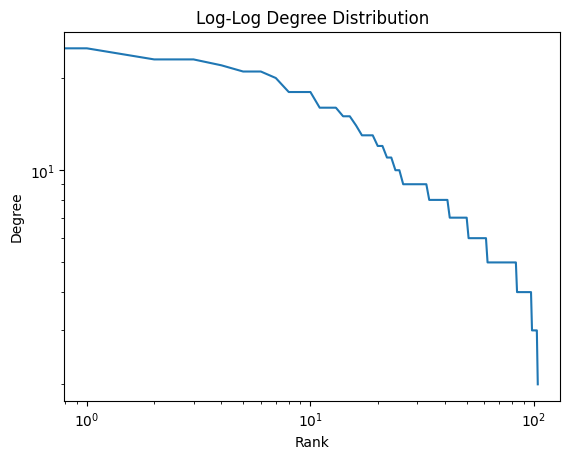

In [61]:
import numpy as np
plt.loglog(sorted(degrees, reverse=True))
plt.title('Log-Log Degree Distribution')
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.show()
